In [ ]:
# Setup YOLO_v5

In [ ]:
#clone YOLO_v5

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__}")

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 15965 (delta 82), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.60 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (10955/10955), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
Setup complete. Using torch 2.

In [ ]:
from roboflow import Roboflow

In [ ]:
os.environ["datset_directory"] = '/content/dataset'

In [ ]:
rf = Roboflow(api_key="Lj3vnvjhxOHgRnLrXjAv")
project = rf.workspace("polytechnic-university-of-timisoara").project("money-detection-dmkfh")
dataset = project.version(4).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Money-Detection-4 in yolov5pytorch:: 100%|██████████| 1676/1676 [00:00<00:00, 2233.81it/s]


Training the yolov5 model

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Money-Detection-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Money-Detection-4/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/37 /content/yolov5/Money-Detection-4/test/images/16_jpg.rf.4887c73ccc86b626213da7563d60c21b.jpg: 640x640 1 5, 11.6ms
image 2/37 /content/yolov5/Money-Detection-4/test/images/19_jpg.rf.43fcd9392fb7cb8c7e2f95619dce3c49.jpg: 640x640 1 1, 11.6ms
image 3/37 /content/yolov5/Money-Detection-4/test/images/1_jpg.rf.edb4b

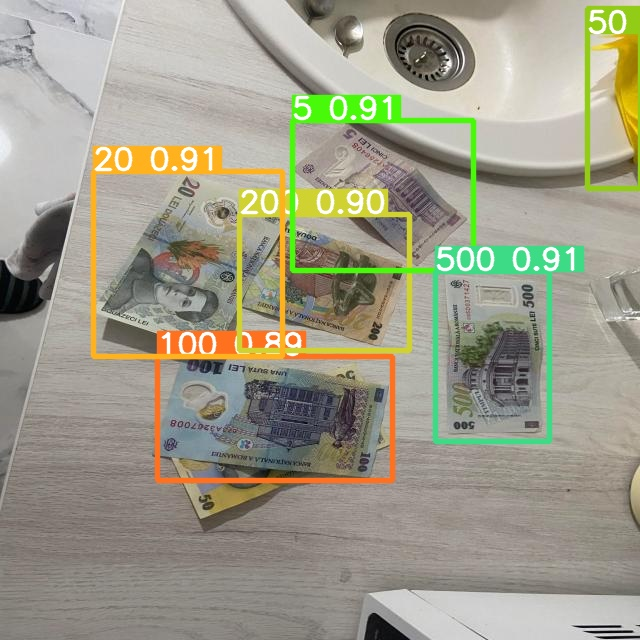

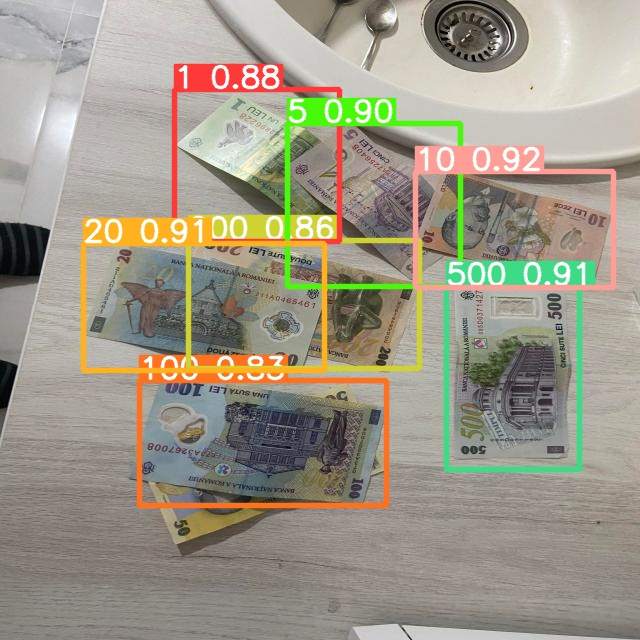

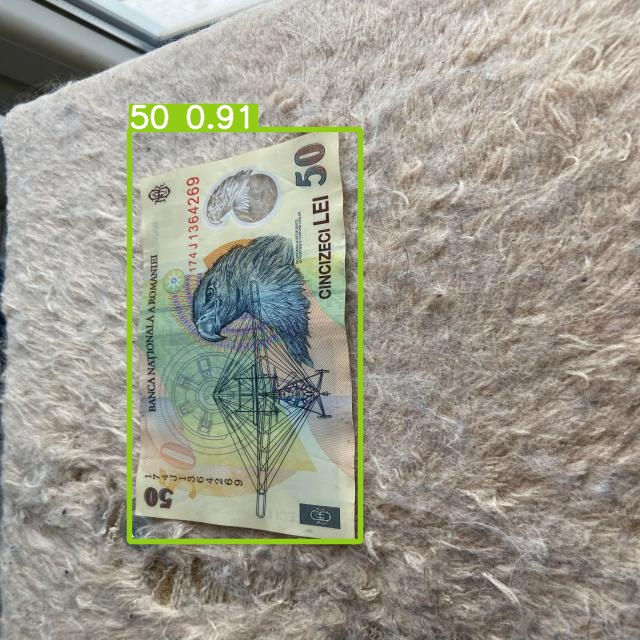

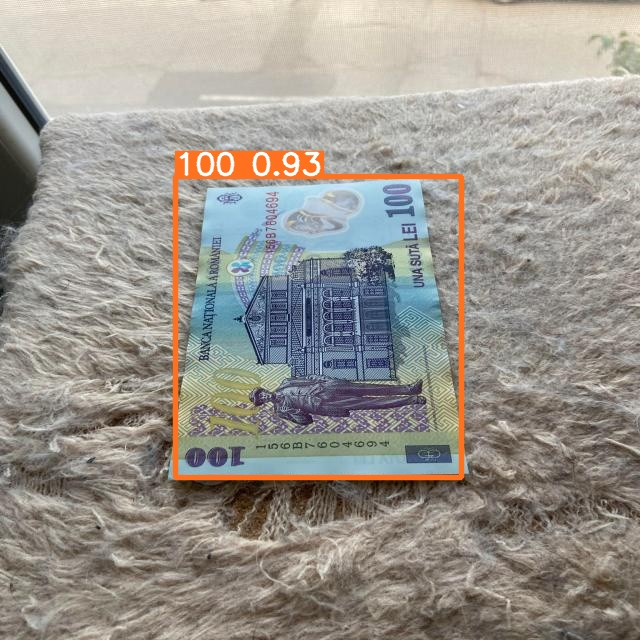

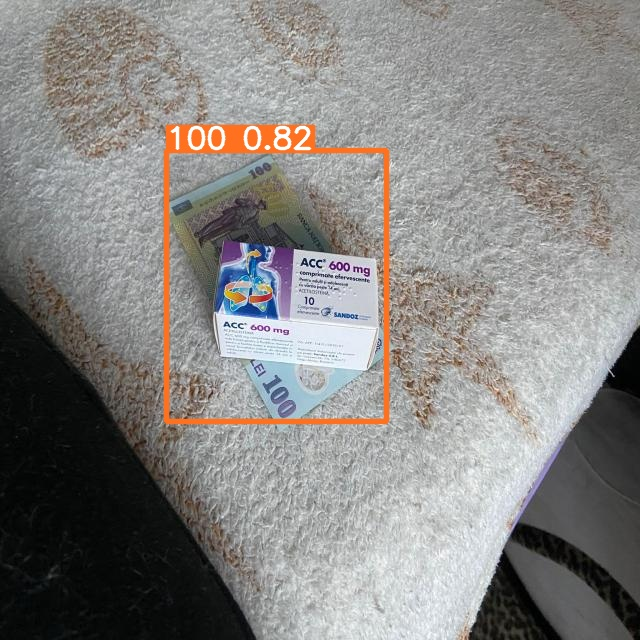

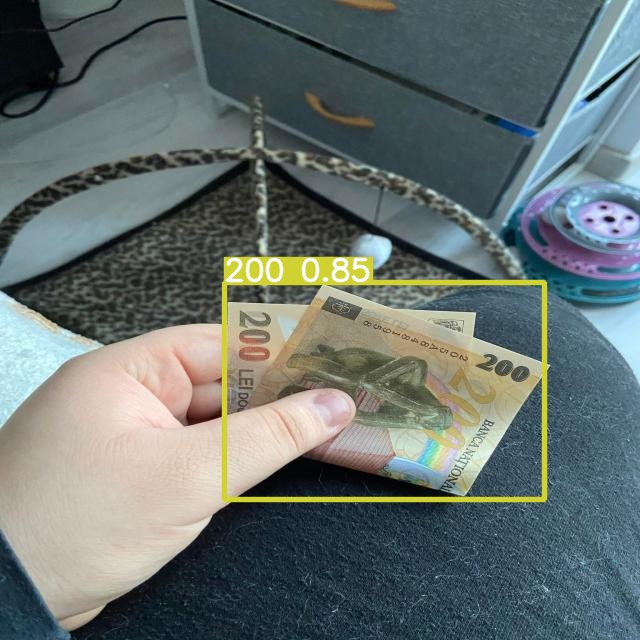

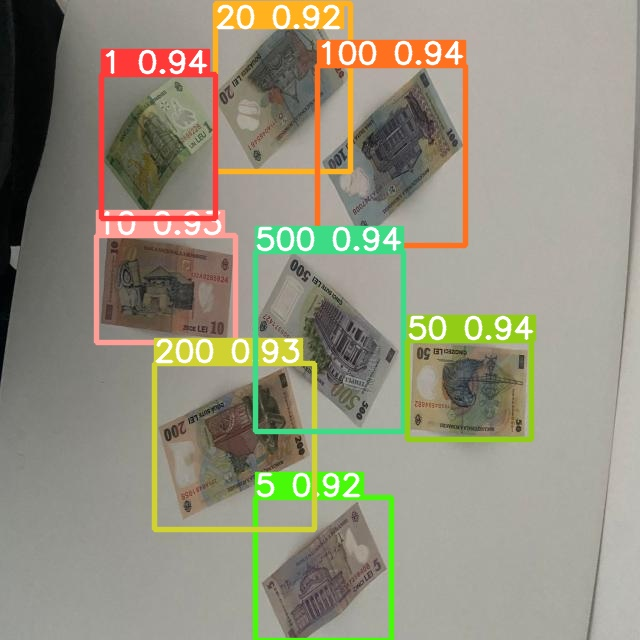

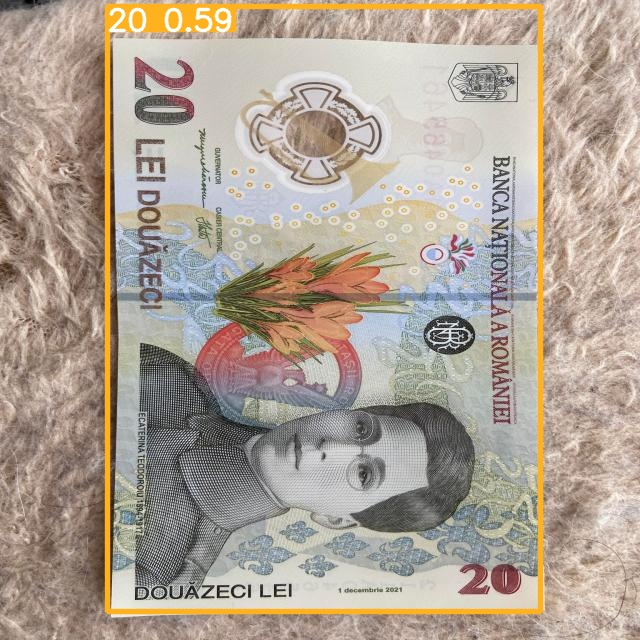

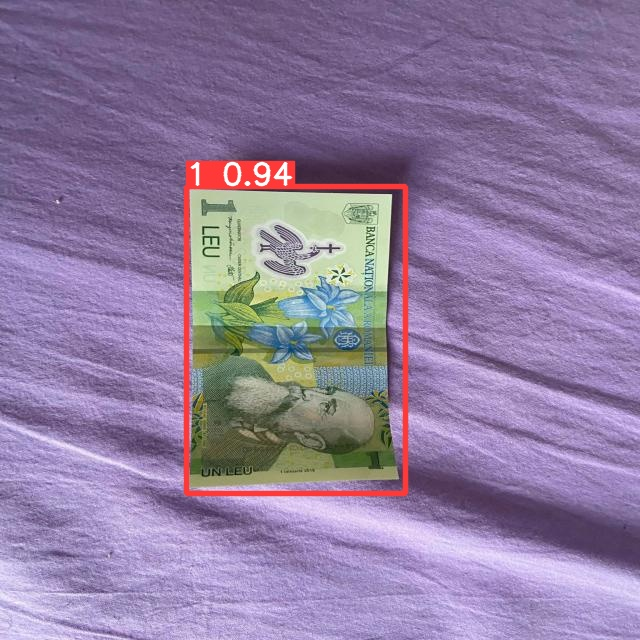

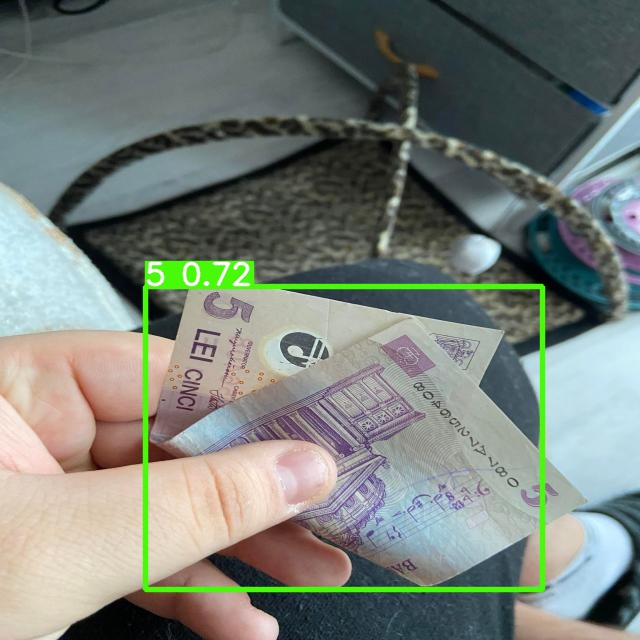

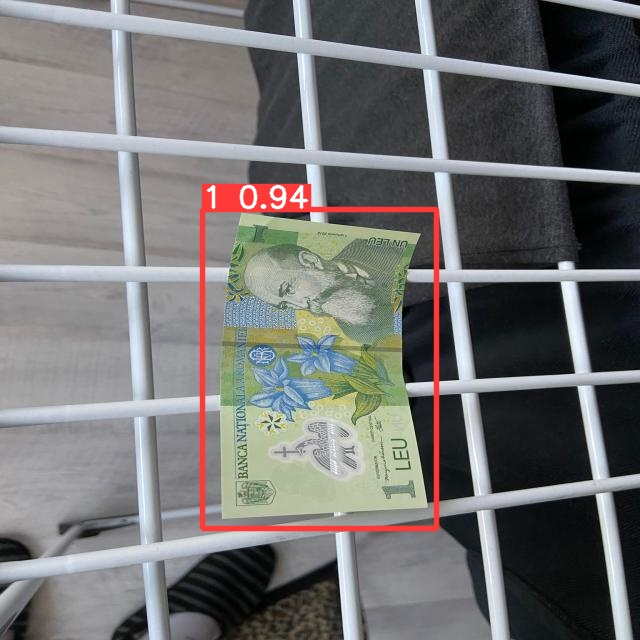

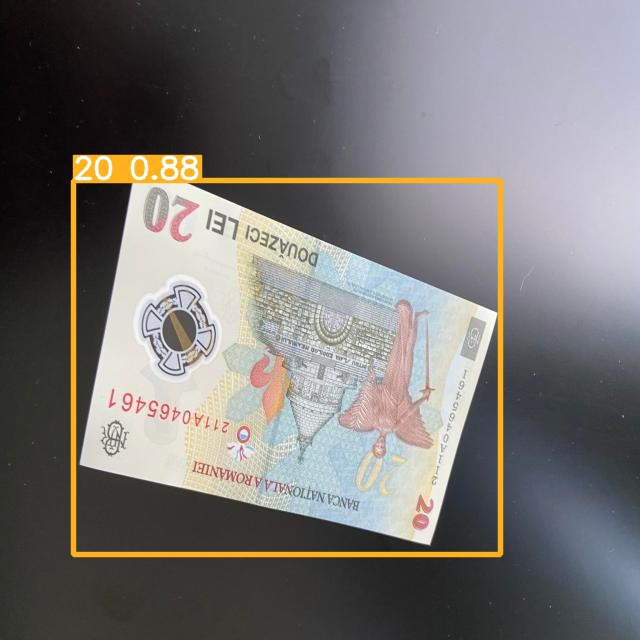

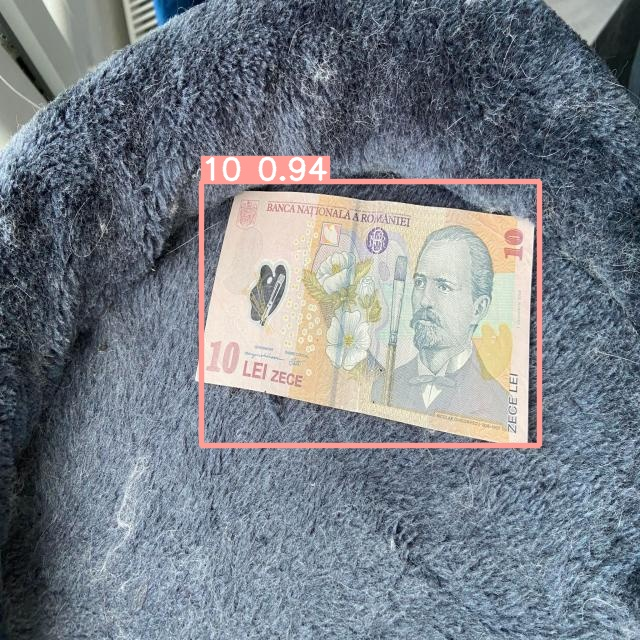

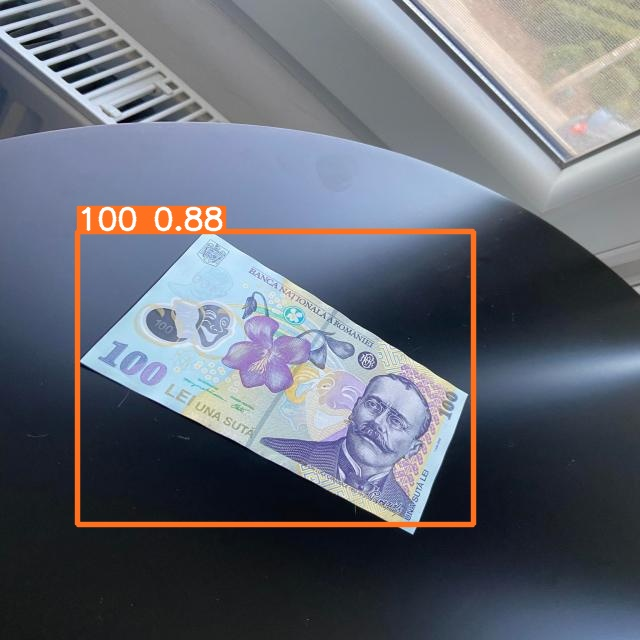

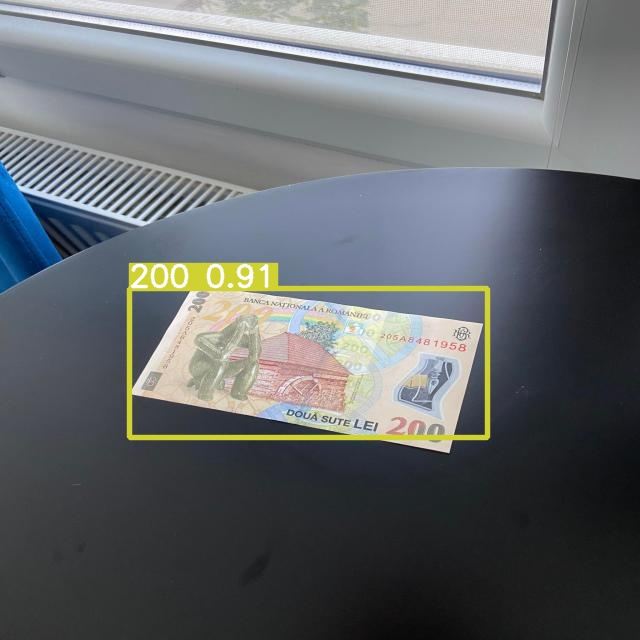

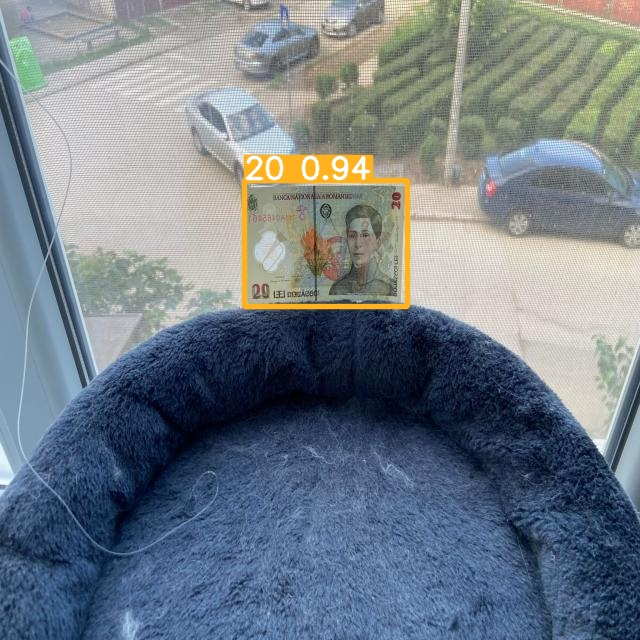

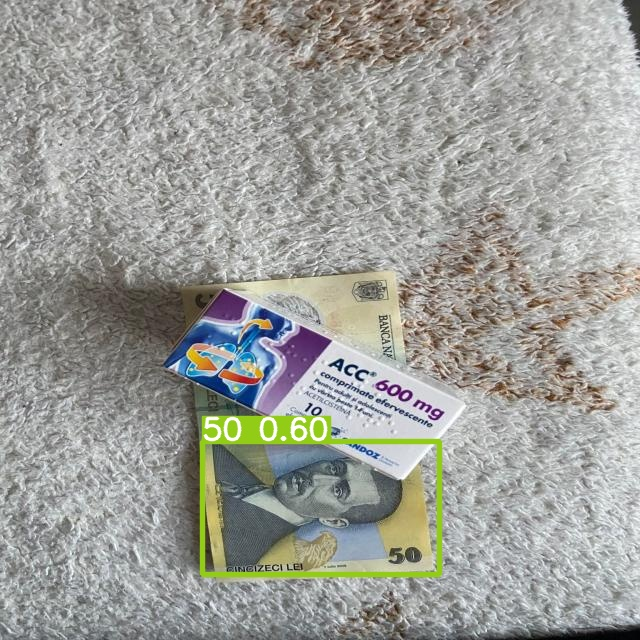

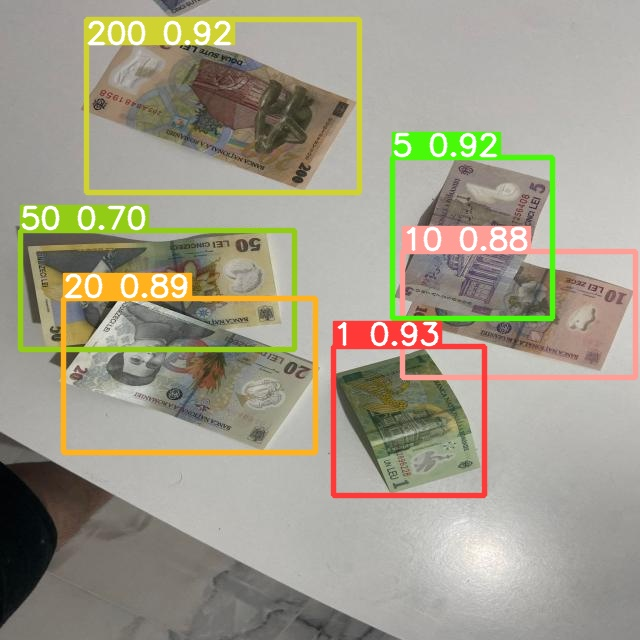

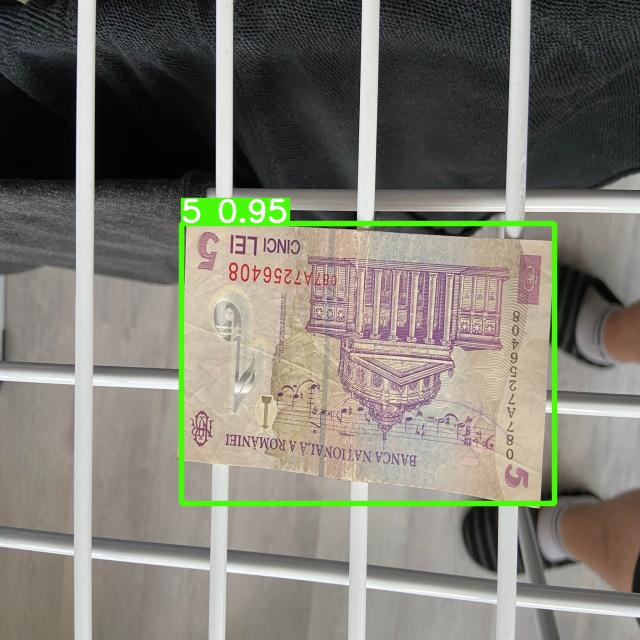

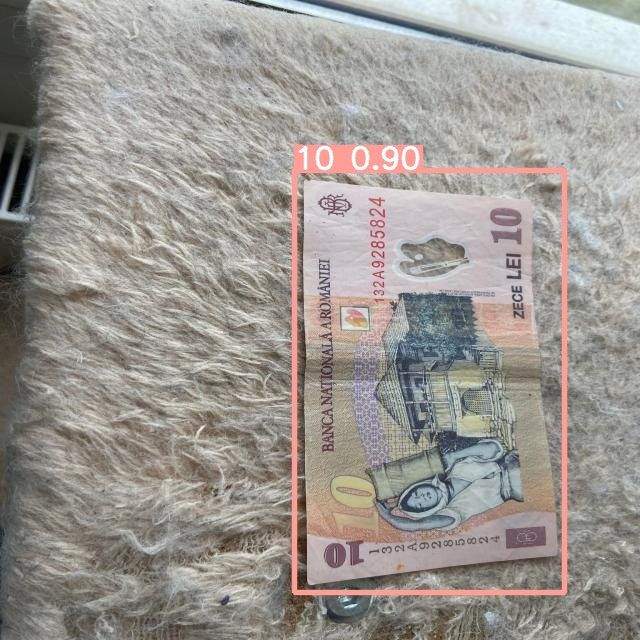

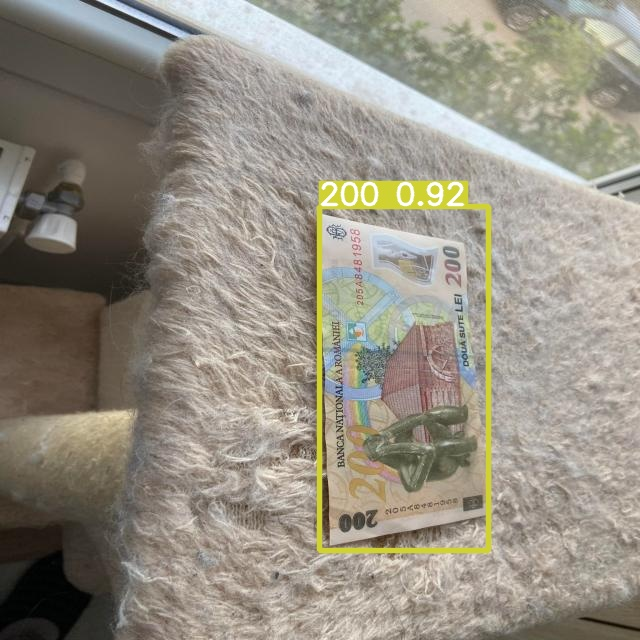

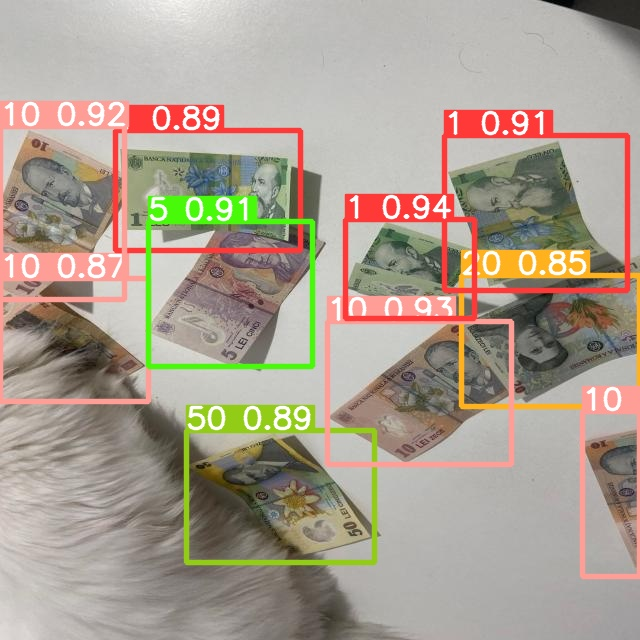

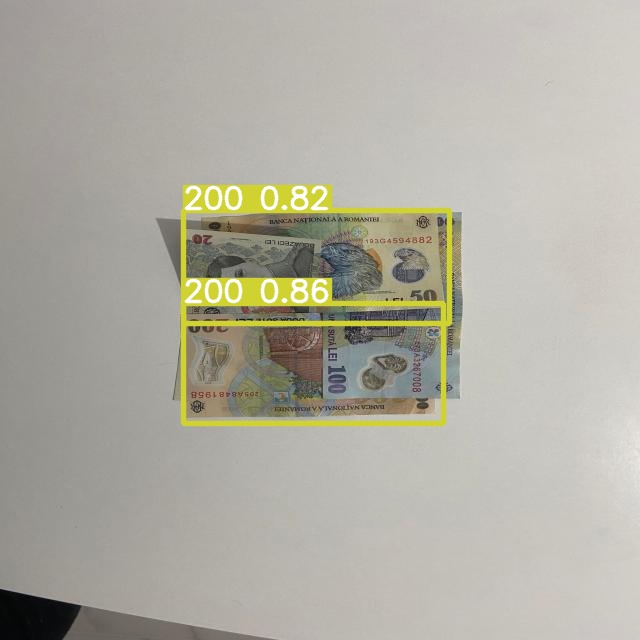

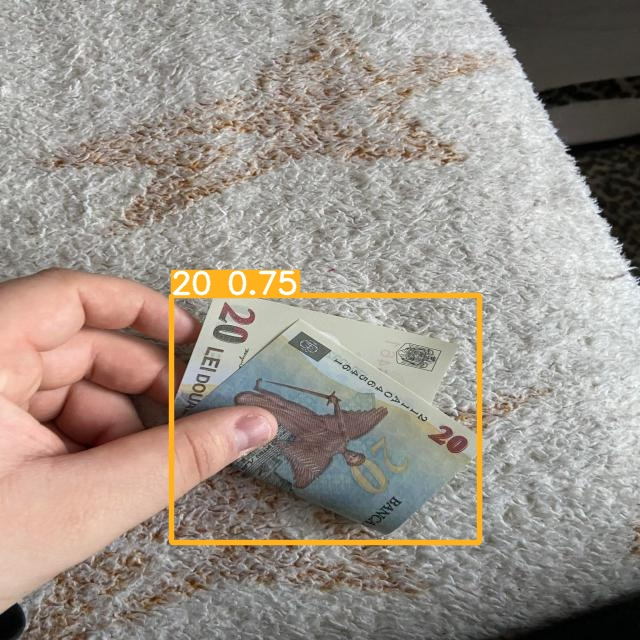

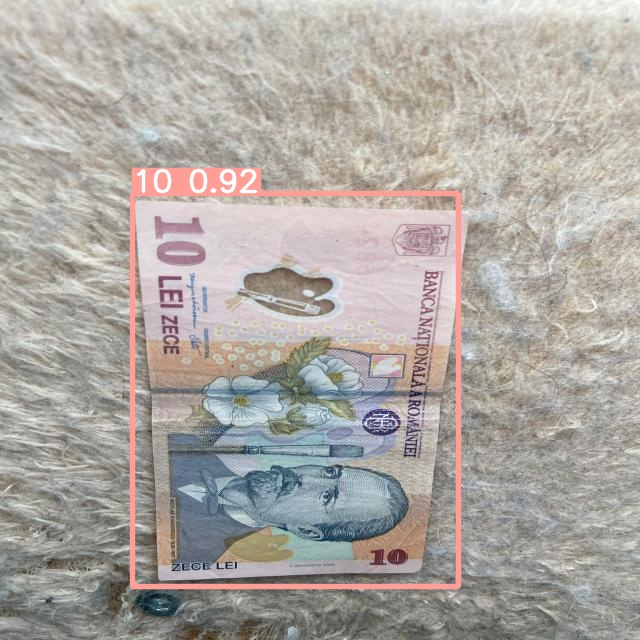

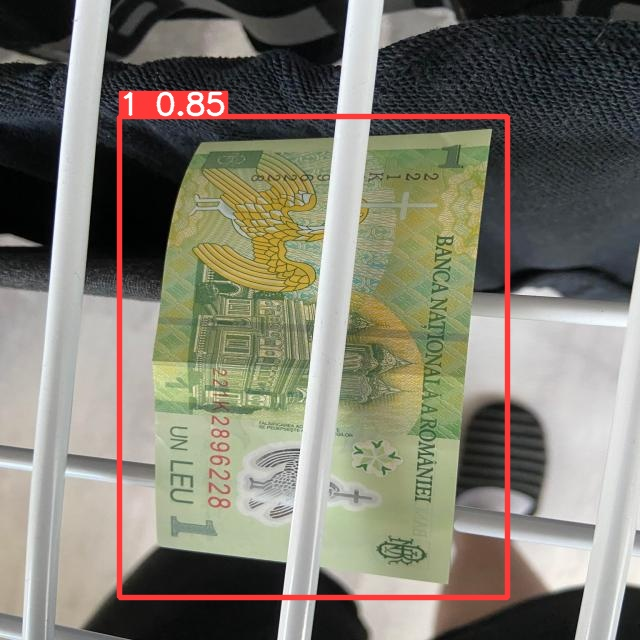

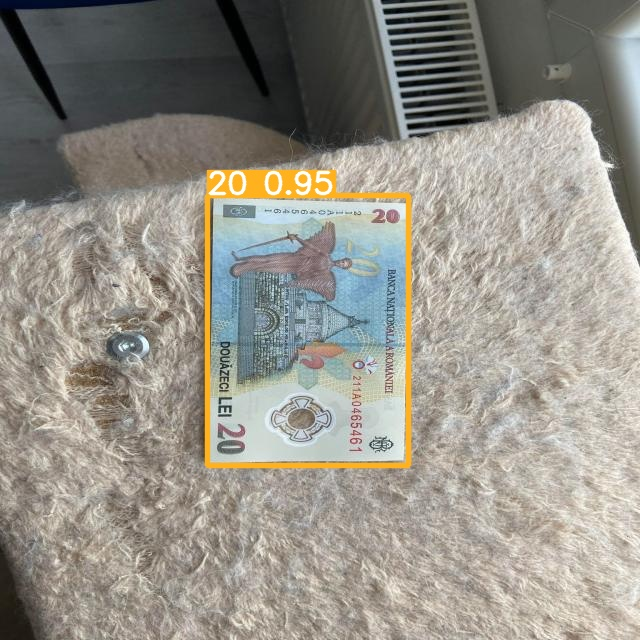

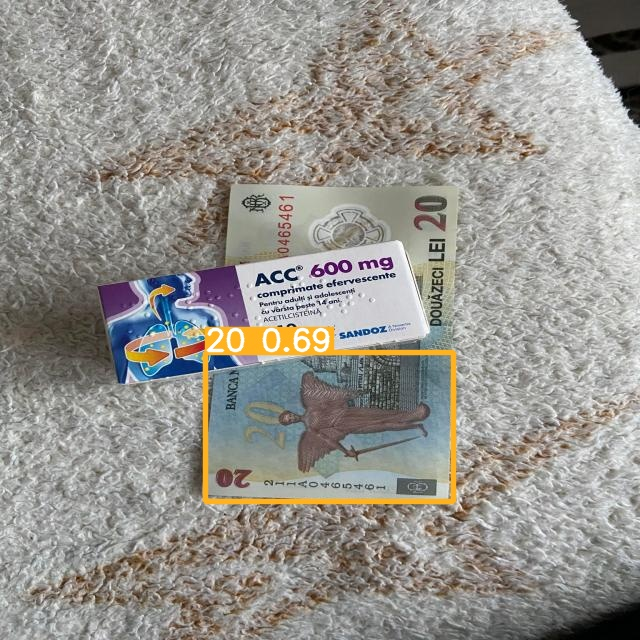

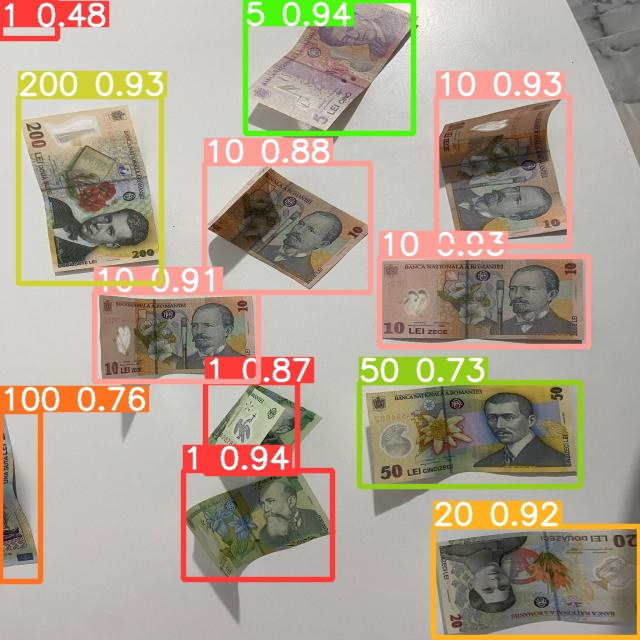

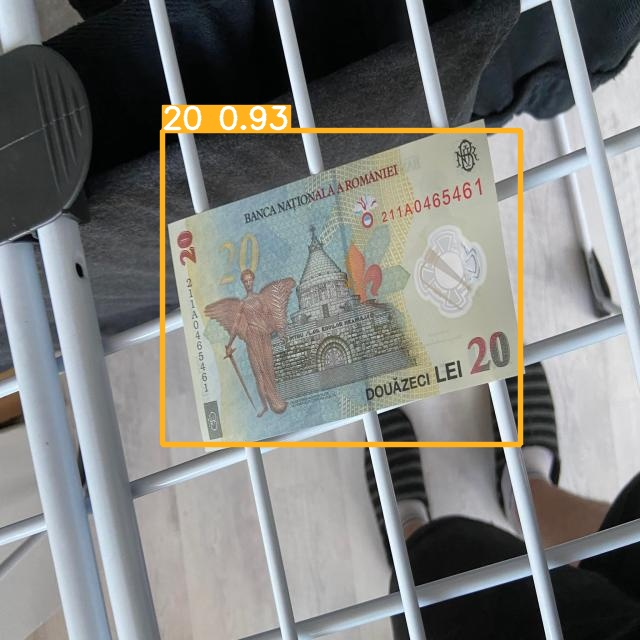

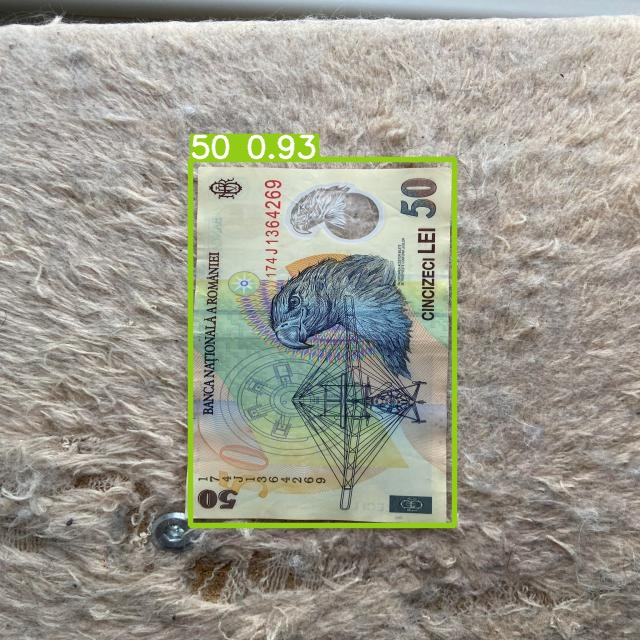

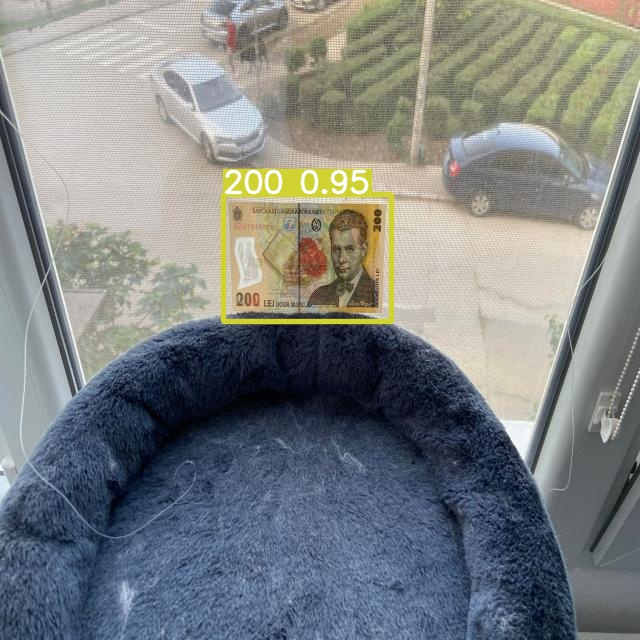

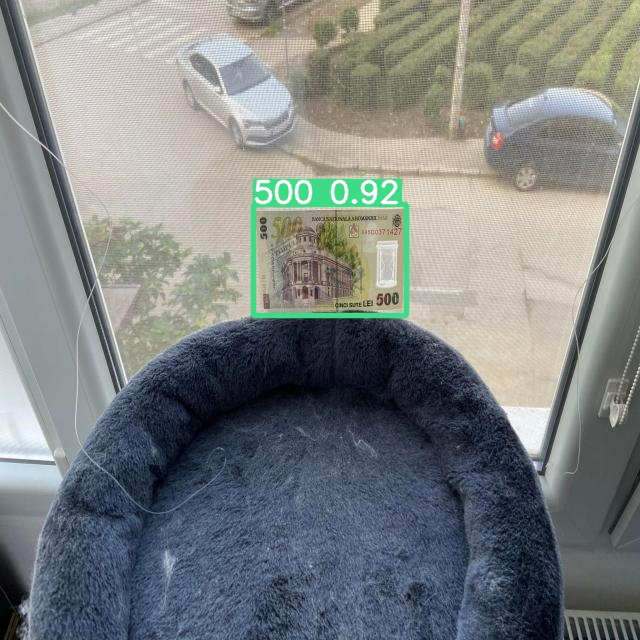

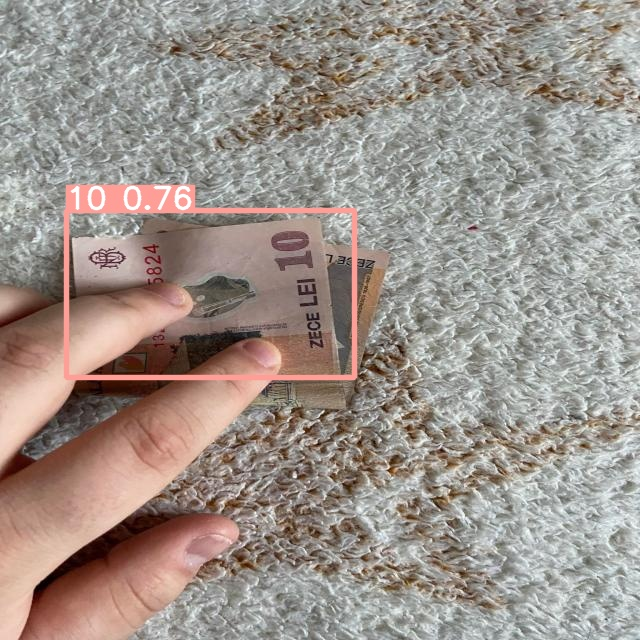

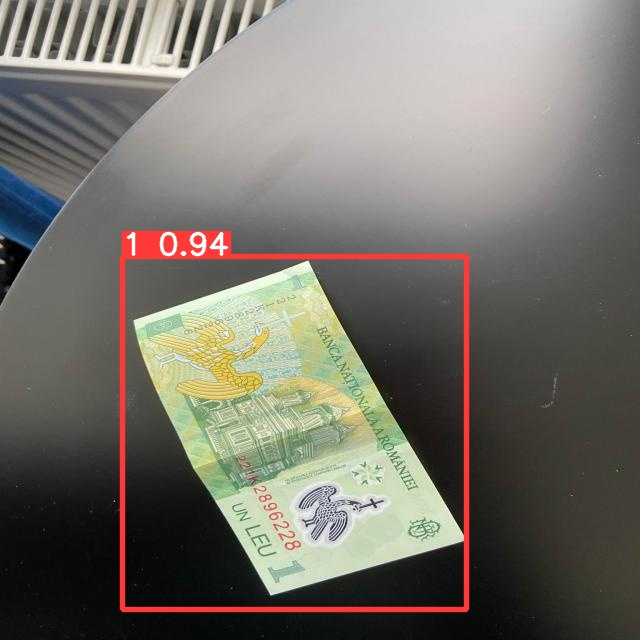

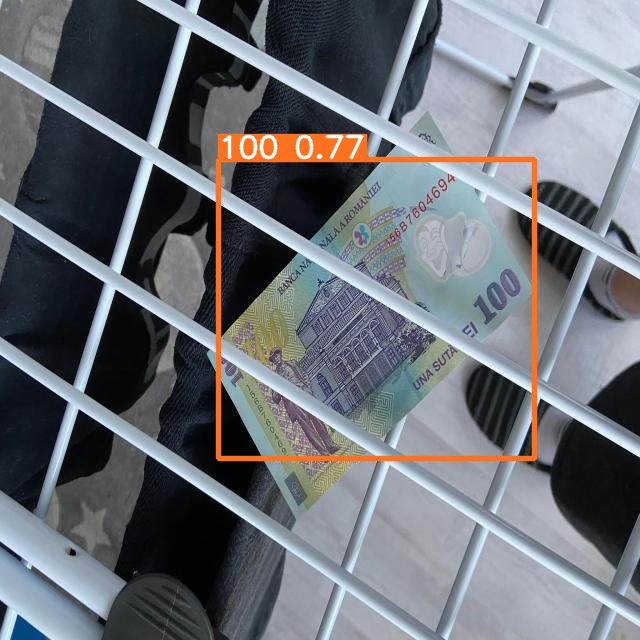

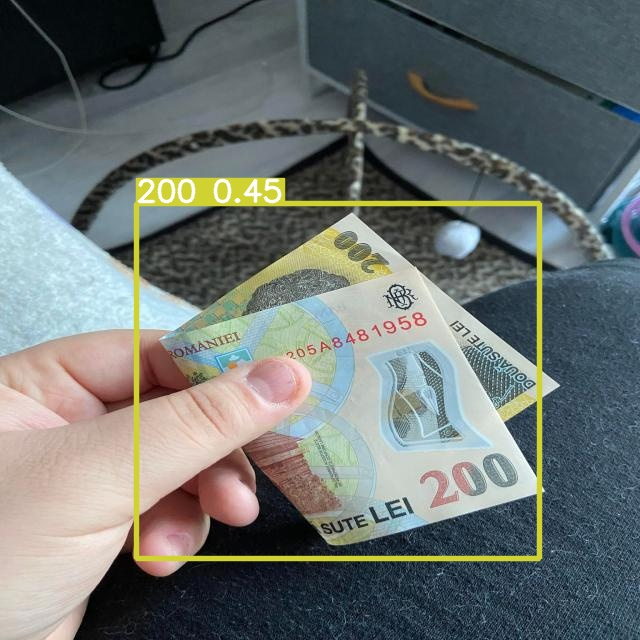

In [ ]:

#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/mix_images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/mix_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/60 /content/mix_images/345150975_609103914509781_5864428558854525776_n (1).jpg: 640x480 1 200, 1 500, 69.6ms
image 2/60 /content/mix_images/345150975_609103914509781_5864428558854525776_n.jpg: 640x480 1 200, 1 500, 8.7ms
image 3/60 /content/mix_images/345821542_235028125823779_2348471121781777894_n (1).jpg: 640x480 1 20, 1 200, 1 500, 8.

In [ ]:

#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python export.py --weights runs/train/exp/weights/best.pt --include tflite saved_model pb --img 640

In [ ]:
from google.colab import files

!zip -r /content/best_saved_model.zip /content/yolov5/runs/train/exp/weights/best_saved_model
files.download("/content/best_saved_model.zip")